### Importação dos dados



In [ ]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


loja.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
print("Faturamento total Loja 1:", loja['Preço'].sum())
print("Faturamento total Loja 2:", loja2['Preço'].sum())
print("Faturamento total Loja 3:", loja3['Preço'].sum())
print("Faturamento total Loja 4:", loja4['Preço'].sum())

Faturamento total Loja 1: 1534509.12
Faturamento total Loja 2: 1488459.06
Faturamento total Loja 3: 1464025.03
Faturamento total Loja 4: 1384497.58


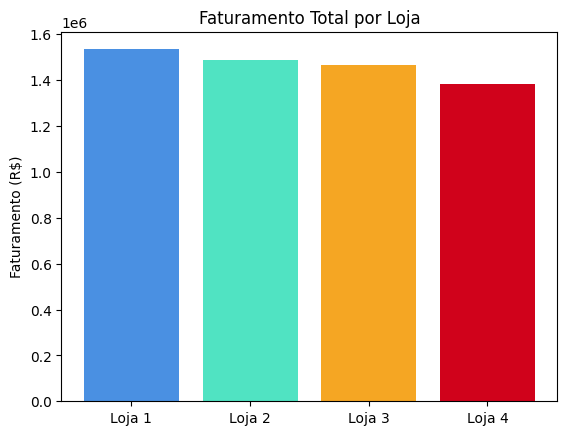

In [ ]:
import matplotlib.pyplot as plt

faturamentos = [
    loja['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()
]

nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.bar(nomes, faturamentos, color=['#4a90e2', '#50e3c2', '#f5a623', '#d0021b'])
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.show()

# 2. Vendas por Categoria

In [ ]:

lojas = [loja, loja2, loja3, loja4]

In [ ]:
for i, loja in enumerate(lojas, start=1) :
        print(f"\n=== Loja { i} ===")


=== Loja 1 ===

=== Loja 2 ===

=== Loja 3 ===

=== Loja 4 ===


In [ ]:
vendas_produto = loja['Produto'].value_counts()
print("Vendas por categoria")
print(vendas_produto)


Vendas por categoria
Produto
Cama box                       62
Faqueiro                       59
Dashboards com Power BI        56
Cama king                      56
Carrinho controle remoto       55
Mesa de jantar                 55
Cômoda                         55
Smart TV                       54
Blocos de montar               54
Pandeiro                       52
Impressora                     50
Modelagem preditiva            50
Assistente virtual             50
Jogo de panelas                50
Bola de basquete               50
Copo térmico                   48
Celular Plus X42               48
Boneca bebê                    48
Bateria                        48
Bola de vôlei                  48
Jogo de tabuleiro              48
Micro-ondas                    48
Fogão                          47
Cubo mágico 8x8                47
Sofá retrátil                  47
Dinossauro Rex                 47
Panela de pressão              46
Jogo de copos                  46
Tablet ABXY        

In [ ]:
dados_comparativos = pd.DataFrame()

In [ ]:
for i, loja in enumerate(lojas, start=1):
    qtd_categoria = loja.groupby("Categoria do Produto")["Produto"].count().reset_index()
    qtd_categoria.columns = ["Categoria do Produto", "Quantidade de Produtos"]
    qtd_categoria = qtd_categoria.sort_values(by="Quantidade de Produtos",ascending=False)
    print(f"\nLoja {i}")
    display(qtd_categoria)


Loja 1


,Categoria do Produto,Quantidade de Produtos
6,moveis,465
2,eletronicos,448
0,brinquedos,324
1,eletrodomesticos,312
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
7,utilidades domesticas,171



Loja 2


,Categoria do Produto,Quantidade de Produtos
6,moveis,442
2,eletronicos,422
0,brinquedos,313
1,eletrodomesticos,305
3,esporte e lazer,275
4,instrumentos musicais,224
5,livros,197
7,utilidades domesticas,181



Loja 3


,Categoria do Produto,Quantidade de Produtos
6,moveis,499
2,eletronicos,451
0,brinquedos,315
1,eletrodomesticos,278
3,esporte e lazer,277
5,livros,185
4,instrumentos musicais,177
7,utilidades domesticas,177



Loja 4


,Categoria do Produto,Quantidade de Produtos
6,moveis,480
2,eletronicos,451
0,brinquedos,338
3,esporte e lazer,277
1,eletrodomesticos,254
7,utilidades domesticas,201
5,livros,187
4,instrumentos musicais,170


# 3. Média de Avaliação das Lojas


In [ ]:
for i, loja in enumerate(lojas, start=1):
    media_avaliacao = loja["Avaliação da compra"].mean()
    print(f"Média de avaliação da Loja {i}: {media_avaliacao:.2f}")


Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.00


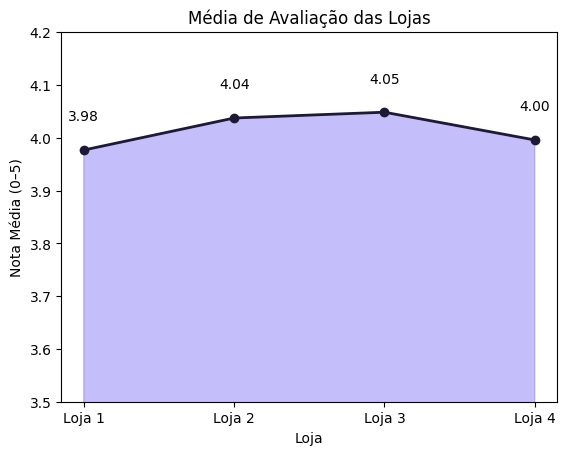

In [ ]:
import matplotlib.pyplot as plt

avaliacoes_medias = [loja["Avaliação da compra"].mean() for loja in lojas]
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ["#0c0116", "#ee340f", "#420430", "#010808"]

plt.fill_between(lojas_nomes, avaliacoes_medias, color="#8A7EF8", alpha=0.5)
plt.plot(lojas_nomes, avaliacoes_medias, color="#1F1935", marker='o', linewidth=2)

plt.title('Média de Avaliação das Lojas')
plt.xlabel('Loja')
plt.ylabel('Nota Média (0–5)')
plt.ylim(3.5, 4.2)

for i, valor in enumerate(avaliacoes_medias):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

# 4. Produtos Mais e Menos Vendidos

In [ ]:
resumo_vendas = []

for i, loja in enumerate(lojas, start=1):

    qtd_produto = loja.groupby("Produto")["Preço"].count().reset_index()
    qtd_produto.columns = ["Produto", "Quantidade de Produtos"]


    qtd_produto = qtd_produto.sort_values(by="Quantidade de Produtos", ascending=False)


    top_2 = qtd_produto.head(2)
    bottom_2 = qtd_produto.tail(2)


    resumo_vendas.append({
        "Loja": f"Loja {i}",
        "Top 2 Mais Vendidos": top_2,
        "2 Menos Vendidos": bottom_2
    })


for loja_info in resumo_vendas:
    print(f"\n {loja_info['Loja']}")
    print("\n Top 2 produtos mais vendidos:")
    display(loja_info["Top 2 Mais Vendidos"])

    print("\n 2 produtos menos vendidos:")
    display(loja_info["2 Menos Vendidos"])


 Loja 1

 Top 2 produtos mais vendidos:


,Produto,Quantidade de Produtos
47,TV Led UHD 4K,60
37,Micro-ondas,60



 2 produtos menos vendidos:


,Produto,Quantidade de Produtos
11,Celular ABXY,33
26,Headset,33



 Loja 2

 Top 2 produtos mais vendidos:


,Produto,Quantidade de Produtos
28,Iniciando em programação,65
37,Micro-ondas,62



 2 produtos menos vendidos:


,Produto,Quantidade de Produtos
36,Mesa de jantar,34
31,Jogo de tabuleiro,32



 Loja 3

 Top 2 produtos mais vendidos:


,Produto,Quantidade de Produtos
32,Kit banquetas,57
36,Mesa de jantar,56



 2 produtos menos vendidos:


,Produto,Quantidade de Produtos
38,Mochila,36
3,Blocos de montar,35



 Loja 4

 Top 2 produtos mais vendidos:


,Produto,Quantidade de Produtos
8,Cama box,62
20,Faqueiro,59



 2 produtos menos vendidos:


,Produto,Quantidade de Produtos
24,Guarda roupas,34
25,Guitarra,33


# 5. Frete Médio por Loja

In [ ]:
for i, loja in enumerate(lojas, start=1):
    frete_medio = loja["Frete"].mean()
    print(f"Frete médio da Loja {i}: R$ {frete_medio:.2f}")

Frete médio da Loja 1: R$ 34.69
Frete médio da Loja 2: R$ 33.62
Frete médio da Loja 3: R$ 33.07
Frete médio da Loja 4: R$ 31.28


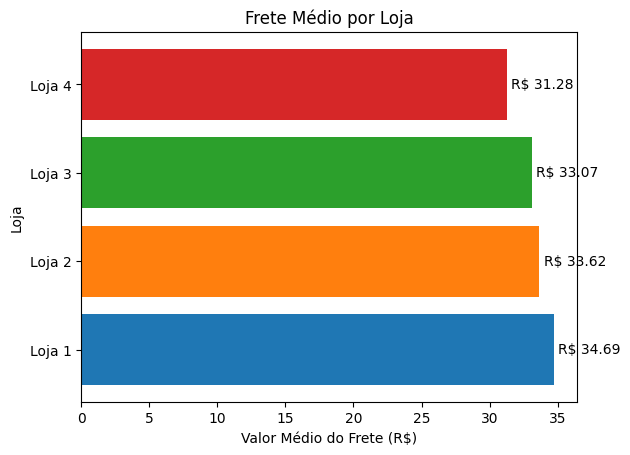

In [ ]:
import matplotlib.pyplot as plt

fretes_medios = [loja["Frete"].mean() for loja in lojas]
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.barh(lojas_nomes, fretes_medios, color=cores)
plt.title('Frete Médio por Loja')
plt.ylabel('Loja')
plt.xlabel('Valor Médio do Frete (R$)')

for i, valor in enumerate(fretes_medios):
    plt.text(valor + (valor * 0.01), i, f"R$ {valor:.2f}", va='center')

plt.show()

# Relatório Final – Análise das Lojas

**Introdução**

O objetivo deste estudo foi analisar o desempenho das quatro lojas do Sr. João, levando-se em conta faturamento, frete, categorias de produtos, produtos mais e menos vendidos e avaliações dos clientes, a fim de identificar qual loja apresenta melhor performance e qual, supostamente, deve ser vendida.

**Análises**

* Faturamento

A Loja 1 apresentou o maior faturamento total entre todas, enquanto a Loja 4 teve o menor desempenho.

* Avaliações dos clientes

A Loja 3 obteve a melhor média de avaliações, indicando maior satisfação dos clientes.

* Frete Médio

A Loja 1 teve o menor custo médio de frete, o que pode contribuir para mais vendas.

* Categorias e Produtos

A Loja 1 concentrou vendas em categorias de maior valor, como eletrônicos, enquanto as Lojas 2 e 4 venderam mais produtos de baixo valor.


**Conclusão**

Com base em todos os indicadores (faturamento, avaliações e frete médio), recomenda-se ao Sr. João que venda a Loja 4, pois apresenta menor faturamento, avaliações inferiores e custos de frete mais altos.


As Lojas 1 e 3 são as mais sólidas, com bom desempenho e potencial de crescimento.

**Observações**

Embora a Loja 4 apresente atualmente o menor faturamento e avaliações abaixo da média, ela pode desempenhar um papel estratégico importante no posicionamento da marca em sua região de atuação, e se este puder ser traduzido em potencial de crescimento, significaria ganhos futuros a depender de ajustes logísticos e de marketing.

E, considerando o cenário atual, a Loja 2, que apresenta desempenho intermediário, poderia ser considerada também como opção de venda, se não ocupar posição estratégica relevante para expansão da marca.



